In [1]:
import matplotlib.pyplot as plt;
import numpy as np;
import scipy;
import pandas as pd;
import sympy as sp;
import seaborn as sns;
import datetime;
import random;
from IPython import display;
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.metrics import confusion_matrix;
from sklearn.metrics import classification_report;
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Parameter Estimation and Model Validation.

## 1.1 Cleaning the Dataset.

### 1.1.1 Dataset of Covid-19.

In [379]:
# Phase 1 to 3 infected, deaths and recovered.
phase_1to3_infected_deaths_recovered_walkin_weeekly = pd.read_csv(r"phase_1to3_infected_deaths_recovered_walkin_weeekly.csv", index_col = 0);

# Phase 1 to 3 infected, deaths and recovered province.
phase_1to3_infected_deaths_recovered_walkin_weeekly_province = pd.read_csv(r"phase_1to3_infected_deaths_recovered_walkin_weeekly_province.csv", index_col = 0);

# Phase 1 to 3 individual case.
phase_1to3_individual_case = pd.read_csv(r"phase_1to3_individual_case.csv", index_col = 0);

# Phase 1 to 3 individual death.
phase_1to3_individual_death = pd.read_csv(r"phase_1to3_death_case.csv", index_col = 0);

C:\Users\Nitti\AppData\Local\Temp\ipykernel_11644\1477855769.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  phase_1to3_individual_case = pd.read_csv(r"phase_1to3_individual_case.csv", index_col = 0);


In [382]:
phase_1to3_infected_deaths_recovered_walkin_weeekly

,year,weeknum,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_recovered,total_recovered,new_death,total_death,case_foreign,case_prison,case_walkin,case_new_prev,case_new_diff,death_new_prev,death_new_diff,update_date
1,2020,3,2,2,0,0,0,0,0,0,2,0,0,0,1,0,0,2023-02-20 07:41:34
2,2020,4,4,6,0,0,0,0,0,0,4,0,0,1,3,0,0,2023-02-20 07:41:34
4,2020,5,13,19,4,4,0,0,0,0,9,0,4,1,12,0,0,2023-02-20 07:41:34
7,2020,6,13,32,7,11,0,0,0,0,6,0,7,0,13,0,0,2023-02-20 07:41:34
9,2020,7,2,34,2,13,0,0,0,0,0,0,2,0,2,0,0,2023-02-20 07:41:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2021,49,35578,2127881,35509,2120985,42164,2042666,240,20917,69,2284,32050,35755,-177,235,5,2023-02-20 07:41:34
45,2021,50,36978,2164859,36850,2157835,47587,2090253,234,21151,128,281,33325,38795,-1817,232,2,2023-02-20 07:41:34
46,2021,51,23770,2188629,23619,2181454,33716,2123969,204,21355,151,554,22751,24717,-947,215,-11,2023-02-20 07:41:34
47,2021,52,18809,2207438,18467,2199921,24788,2148757,203,21558,342,307,17758,19175,-366,201,2,2023-02-20 07:41:34


In [383]:
phase_1to3_infected_deaths_recovered_walkin_weeekly_province

,year,weeknum,province,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_recovered,total_recovered,new_death,total_death,update_date
0,2020,3,Nakhon Phanom,0,0,0,0,0,0,0,0,2023-02-11 09:15:41
1,2020,3,Lamphun,0,0,0,0,0,0,0,0,2023-02-13 07:37:34
2,2020,3,Phrae,0,0,0,0,0,0,0,0,2023-02-13 07:37:34
3,2020,3,Suphanburi,0,0,0,0,0,0,0,0,2023-02-13 07:37:34
4,2020,3,Not Specified,0,0,0,0,0,0,0,0,2023-02-13 07:37:34
...,...,...,...,...,...,...,...,...,...,...,...,...
3866,2021,52,Prathum Thani,248,43510,248,43380,0,0,1,831,2023-02-20 07:41:34
3867,2021,52,Sakon Nakhon,43,8048,43,8048,0,0,1,38,2023-02-20 07:41:34
3868,2021,52,Trang,300,18124,300,18122,0,0,6,115,2023-02-20 07:41:34
3869,2021,52,Phetchabun,188,12901,188,12900,0,0,2,131,2023-02-20 07:41:34


In [384]:
phase_1to3_individual_case

,year,weeknum,gender,age_number,age_range,job,risk,patient_type,province,reporting_group,region_odpc,region,update_date
0,2020,3,female,74.0,>= 70 ปี,นักท่องเที่ยว,คนต่างชาติเดินทางมาจากต่างประเทศ,screening from checkpoints,Bangkok,come from abroad,เขต 13 (สปคม.),Bangkok Metropolitan/Central Region,2023-02-13 07:37:34
1,2020,3,female,61.0,60-69 ปี,นักท่องเที่ยว,คนต่างชาติเดินทางมาจากต่างประเทศ,screening from checkpoints,Bangkok,come from abroad,เขต 13 (สปคม.),Bangkok Metropolitan/Central Region,2023-02-13 07:37:34
2,2020,4,male,68.0,60-69 ปี,นักท่องเที่ยว,คนต่างชาติเดินทางมาจากต่างประเทศ,foreigners from abroad,Bangkok,come from abroad,เขต 13 (สปคม.),Bangkok Metropolitan/Central Region,2023-02-13 07:37:34
3,2020,4,female,73.0,>= 70 ปี,นักท่องเที่ยว,คนต่างชาติเดินทางมาจากต่างประเทศ,Thais from abroad,Nakhon Pathom,come from abroad,เขต 5,Bangkok Metropolitan/Central Region,2023-02-13 07:37:34
4,2020,4,female,33.0,30-39 ปี,นักท่องเที่ยว,คนต่างชาติเดินทางมาจากต่างประเทศ,foreigners from abroad,Bangkok,come from abroad,เขต 13 (สปคม.),Bangkok Metropolitan/Central Region,2023-02-13 07:37:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194567,2021,52,male,33.0,30-39 ปี,NaN,Test and Go,foreigners from abroad,Bangkok,come from abroad,เขต 13 (สปคม.),Bangkok Metropolitan/Central Region,19/10/2022 7:27
194568,2021,52,male,73.0,>= 70 ปี,NaN,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,high risk contact,Chiang Mai,normal cases,เขต 1,North/North East,19/10/2022 7:27
194569,2021,52,female,22.0,20-29 ปี,NaN,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,high risk contact,Prathum Thani,normal cases,เขต 4,Bangkok Metropolitan/Central Region,19/10/2022 7:27
194570,2021,52,female,37.0,30-39 ปี,NaN,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,high risk contact,Bangkok,normal cases,เขต 13 (สปคม.),Bangkok Metropolitan/Central Region,19/10/2022 7:27


In [385]:
phase_1to3_individual_death

,year,weeknum,province,age,age_range,occupation,type,death_cluster,update_date
0,2020,10,Bangkok,35.0,30-39 ปี,bussiness owner,ผู้ป่วยยืนยัน,foreigner,2023-02-20
1,2020,13,Bangkok,70.0,>= 70 ปี,office worker,ผู้ป่วยยืนยัน,foreigner,2023-02-20
2,2020,13,Bangkok,79.0,>= 70 ปี,others,ผู้ป่วยยืนยัน,boxing stadium,2023-02-20
3,2020,13,Narathiwat,50.0,50-59 ปี,freelance,ผู้ป่วยยืนยัน,merit event Malaysia,2023-02-20
4,2020,13,Bangkok,55.0,50-59 ปี,office worker,ผู้ป่วยยืนยัน,HCW,2023-02-20
...,...,...,...,...,...,...,...,...,...
21599,2021,52,Songkhla,61.0,60-69 ปี,unemployed,ผู้ป่วยยืนยัน,NaN,2023-02-20
21600,2021,52,Lampang,76.0,>= 70 ปี,not identified,ผู้ป่วยยืนยัน,NaN,2023-02-20
21601,2021,52,Lampang,85.0,>= 70 ปี,not identified,ผู้ป่วยยืนยัน,NaN,2023-02-20
21602,2021,52,Mae Hong Son,74.0,>= 70 ปี,not identified,ผู้ป่วยยืนยัน,NaN,2023-02-20


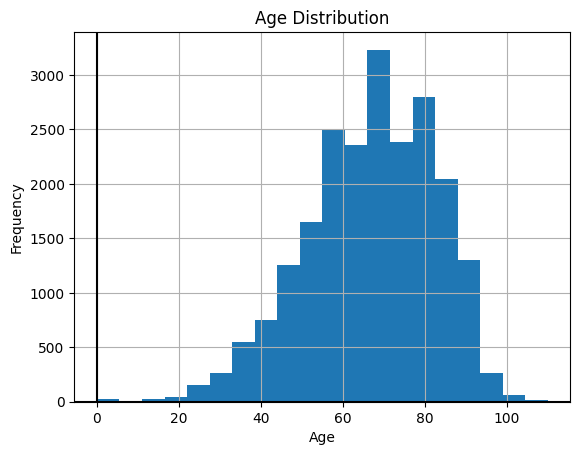

In [386]:
fig, ax1 = plt.subplots();

ax1.hist(phase_1to3_individual_death["age"], bins = 20)

ax1.set_title('Age Distribution');
ax1.set_xlabel("Age");
ax1.set_ylabel("Frequency");

ax1.grid();
ax1.axvline(x = 0, color = 'black');
ax1.axhline(y = 0, color = 'black');

### 1.1.2 Count the Domestic Weekly and Accumulated Deaths from the Individual Death List.

In [387]:
# Drop age 0 individual.
index_to_drop = phase_1to3_individual_death[(phase_1to3_individual_death['age'] == 0)].index;
phase_1to3_individual_death = (phase_1to3_individual_death.drop(index_to_drop[0]));

# create a dataframe and count the weekly and accumulated deaths from the individual death list.
weekly_death_walkin = np.zeros(len(phase_1to3_infected_deaths_recovered_walkin_weeekly));
df = phase_1to3_infected_deaths_recovered_walkin_weeekly[["year", "weeknum"]];
df["weekly_death_walkin"] = weekly_death_walkin;
df = df.reset_index(drop = True);

# extract rows excluding foreigner and prison deathcluster.
phase_1to3_individual_death_filtered = phase_1to3_individual_death.copy();

phase_1to3_individual_death_filtered = phase_1to3_individual_death_filtered.dropna(subset = ['death_cluster']);
index_to_drop = phase_1to3_individual_death_filtered[(phase_1to3_individual_death_filtered['death_cluster'] == "foreigner") | (phase_1to3_individual_death_filtered['death_cluster'] == "prison")].index;
phase_1to3_individual_death_filtered.drop(index_to_drop, inplace = True);

# count the weekly deaths from individual death list.
for i in range(len(phase_1to3_individual_death_filtered)):
    row_data = phase_1to3_individual_death_filtered.iloc[i];
    y, w = row_data[0], row_data[1];
    df_row_index = df.loc[(df['year'] == y) & (df['weeknum'] == w)].index[0];
    df_row = df.iloc[df_row_index];
    n = df_row.iloc[2] + 1;
    df.loc[df_row_index, "weekly_death_walkin"] = n;

# find the accumulated deaths from weekly deaths.
total_death_walkin = [];
total_deaths = 0;
l = df["weekly_death_walkin"];
for i in range(len(l)):
    total_deaths += l[i];
    total_death_walkin.append(total_deaths);
df["total_death_walkin"] = total_death_walkin;

# merged the dataset
phase_1to3_infected_deaths_recovered_walkin_weeekly = pd.merge(phase_1to3_infected_deaths_recovered_walkin_weeekly, df, on = ["year", "weeknum"]);

C:\Users\Nitti\AppData\Local\Temp\ipykernel_11644\721217166.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weekly_death_walkin"] = weekly_death_walkin;


In [388]:
phase_1to3_infected_deaths_recovered_walkin_weeekly

,year,weeknum,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_recovered,total_recovered,new_death,total_death,case_foreign,case_prison,case_walkin,case_new_prev,case_new_diff,death_new_prev,death_new_diff,update_date,weekly_death_walkin,total_death_walkin
0,2020,3,2,2,0,0,0,0,0,0,2,0,0,0,1,0,0,2023-02-20 07:41:34,0.0,0.0
1,2020,4,4,6,0,0,0,0,0,0,4,0,0,1,3,0,0,2023-02-20 07:41:34,0.0,0.0
2,2020,5,13,19,4,4,0,0,0,0,9,0,4,1,12,0,0,2023-02-20 07:41:34,0.0,0.0
3,2020,6,13,32,7,11,0,0,0,0,6,0,7,0,13,0,0,2023-02-20 07:41:34,0.0,0.0
4,2020,7,2,34,2,13,0,0,0,0,0,0,2,0,2,0,0,2023-02-20 07:41:34,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2021,49,35578,2127881,35509,2120985,42164,2042666,240,20917,69,2284,32050,35755,-177,235,5,2023-02-20 07:41:34,24.0,4189.0
100,2021,50,36978,2164859,36850,2157835,47587,2090253,234,21151,128,281,33325,38795,-1817,232,2,2023-02-20 07:41:34,24.0,4213.0
101,2021,51,23770,2188629,23619,2181454,33716,2123969,204,21355,151,554,22751,24717,-947,215,-11,2023-02-20 07:41:34,29.0,4242.0
102,2021,52,18809,2207438,18467,2199921,24788,2148757,203,21558,342,307,17758,19175,-366,201,2,2023-02-20 07:41:34,19.0,4261.0


### 1.1.3 Caculating Domestic Recovered Cases of Phase 1 to 3 Weekly Covid-19 for the Entire Country.

In [389]:
# Define recovered domestic cases = (accumulated domestic infected cases/accumulated infected cases)*accumulated recovered cases.

# find the accumulated domestic infected cases from weekly recovered.
accumulated_domestic_infected_cases = [];
total_recovered = 0;
l = phase_1to3_infected_deaths_recovered_walkin_weeekly["case_walkin"];
for i in range(len(l)):
    total_recovered += l[i];
    accumulated_domestic_infected_cases.append(total_recovered);
phase_1to3_infected_deaths_recovered_walkin_weeekly["accumulated_domestic_infected_cases"] = accumulated_domestic_infected_cases;

# accumulated domestic infected cases/accumulated infected cases.
total_domestic_infected_to_total_infected_ratio = phase_1to3_infected_deaths_recovered_walkin_weeekly["accumulated_domestic_infected_cases"]/phase_1to3_infected_deaths_recovered_walkin_weeekly["total_case"];

# recovered domestic cases.
accumulated_domestic_recovered = total_domestic_infected_to_total_infected_ratio*phase_1to3_infected_deaths_recovered_walkin_weeekly["total_recovered"];
phase_1to3_infected_deaths_recovered_walkin_weeekly["accumulated_domestic_recovered"] = accumulated_domestic_recovered;

### 1.1.3 Extracting Relevant Columns of Phase 1 to 3 Covid-19 Infected, Deaths and Recovered.

In [390]:
phase_1to3_infected_deaths_recovered_walkin_weeekly = phase_1to3_infected_deaths_recovered_walkin_weeekly[["year", "weeknum", "case_walkin", "accumulated_domestic_recovered", "total_death_walkin", "accumulated_domestic_infected_cases"]];
phase_1to3_infected_deaths_recovered_walkin_weeekly = phase_1to3_infected_deaths_recovered_walkin_weeekly.iloc[2:];
phase_1to3_infected_deaths_recovered_walkin_weeekly

,year,weeknum,case_walkin,accumulated_domestic_recovered,total_death_walkin,accumulated_domestic_infected_cases
2,2020,5,4,0.000000e+00,0.0,4
3,2020,6,7,0.000000e+00,0.0,11
4,2020,7,2,0.000000e+00,0.0,13
5,2020,8,1,0.000000e+00,0.0,14
6,2020,9,5,0.000000e+00,0.0,19
...,...,...,...,...,...,...
99,2021,49,32050,1.652375e+06,4189.0,1721308
100,2021,50,33325,1.694164e+06,4213.0,1754633
101,2021,51,22751,1.724874e+06,4242.0,1777384
102,2021,52,17758,1.747421e+06,4261.0,1795142


### 1.1.4 Graph of Phase 1 to 3 Covid-19 Infected, Deaths and Recovered.

In [391]:
# estimated total susceptable.
accumulated_domestic_infected_case = phase_1to3_infected_deaths_recovered_walkin_weeekly["accumulated_domestic_infected_cases"];
total_susceptable = np.array(5000000*np.ones(len(phase_1to3_infected_deaths_recovered_walkin_weeekly)) - accumulated_domestic_infected_case);

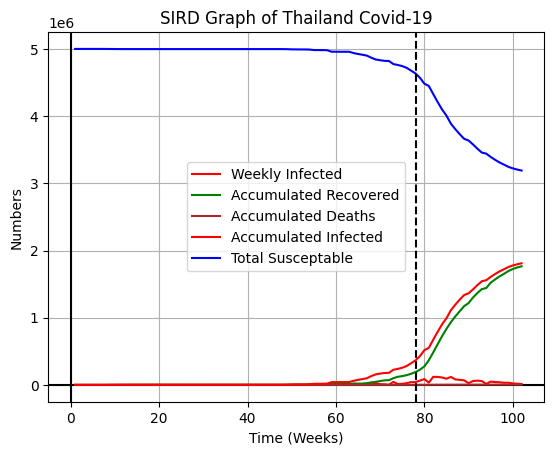

In [392]:
time = np.arange(1, len(phase_1to3_infected_deaths_recovered_walkin_weeekly) + 1);

fig, ax = plt.subplots();
ax.grid();
ax.axvline(x = 0, color = 'black');
ax.axhline(y = 0, color = 'black');
ax.set_title('SIRD Graph of Thailand Covid-19');
ax.set_xlabel("Time (Weeks)");
ax.set_ylabel("Numbers");

ax.plot(time, phase_1to3_infected_deaths_recovered_walkin_weeekly["case_walkin"], label = "Weekly Infected", color = "red");
ax.plot(time, phase_1to3_infected_deaths_recovered_walkin_weeekly["accumulated_domestic_recovered"], label = "Accumulated Recovered", color = "green");
ax.plot(time, phase_1to3_infected_deaths_recovered_walkin_weeekly["total_death_walkin"], label = "Accumulated Deaths", color = "brown");
ax.plot(time, phase_1to3_infected_deaths_recovered_walkin_weeekly["accumulated_domestic_infected_cases"], label = "Accumulated Infected", color = "red");
ax.plot(time, total_susceptable, label = "Total Susceptable", color = "blue");

ax.axvline(x = 75+3, color = 'black', linestyle = "dashed");

leg = ax.legend();

### 1.1.3 Extracting Relevant Columns of Phase 1 to 3 Weekly Covid-19 Infected, Deaths and Recovered by Regions.

## 1.2 Parameters Estimation from Covid-19 Data (Jan 2020 to Dec 2021).

### 1.2.1 SIRD Model.

In [410]:
active_case = np.array(phase_1to3_infected_deaths_recovered_walkin_weeekly["case_walkin"]);
accumulated_recovered = np.array(phase_1to3_infected_deaths_recovered_walkin_weeekly["accumulated_domestic_recovered"]);
accumulated_death = np.array(phase_1to3_infected_deaths_recovered_walkin_weeekly["total_death_walkin"]);

In [411]:
independent_variable = time;
dependent_variable = np.vstack((total_susceptable, active_case, accumulated_recovered, accumulated_death));

In [427]:
# initial guesses for parameters
beta, gamma, alpha, theta = 0.325, 0.15, 0.001, -0.001;
parameter_guesses = np.array([beta, gamma, alpha, theta]);

In [428]:
number_of_dependent_variables = 4;

def system_of_ODEs_model(v, t, parameters):
    S = v[0];
    I = v[1];
    R = v[2];
    D = v[3];
    N = total_susceptable[0];

    beta = parameters[0];
    gamma = parameters[1];
    alpha = parameters[2];
    theta = parameters[3];

    dSdt = -beta*S*I/N + theta*R;
    dIdt = beta*S*I/N -gamma*I -alpha*I;
    dRdt = gamma*I -theta*R;
    dDdt = alpha*I;
    return [dSdt, dIdt, dRdt, dDdt];

# initial condition
v_0 = np.array(
    [total_susceptable[0],
    active_case[0],
    accumulated_recovered[0],
    accumulated_death[0]]); # initial condition should include a decimal and t_0 is set to be the first value of the dependent variable by default.

### 1.2.2 System of ODE Solver.

In [429]:
def system_of_ODEs_model_from_parmeters(independent_variable, *params):
    dependent_variable_calculated = np.zeros((len(independent_variable), number_of_dependent_variables));
    """
    [[0,0],
    ...,
    [0,0]]
    """
    #Solve the ODEs at independent variable points and return calculated dependent calculated using current values of the parameters.
    for i in range(0, len(independent_variable)):
        if independent_variable[i] == independent_variable[0]: # should include a decimal.      
            dependent_variable_calculated[i,:] = v_0;
        else:
            independent_variable_span = np.linspace(0.0,independent_variable[i], 101);
            ySoln = scipy.integrate.odeint(system_of_ODEs_model, v_0,independent_variable_span, args = (params,)); # soln for entire independent_variable_span
            # edit for > 1 dependent variables:            
            dependent_variable_calculated[i,:] = ySoln[-1,:]; # calculated y at the end of the independent_variable_span
            # at this point dependent_variable_calculated is now 2D matrix with the number of columns set as : to include all yvariables
            # curve_fit needs a 1D vector that has the rows in a certain order, which result from the next two commands
    yaxisOutput = np.transpose(dependent_variable_calculated);
    yaxisOutput = np.ravel(yaxisOutput);
    return yaxisOutput;


# Estimate the parameters
# np.ravel(yaxisData) transforms yaxisData from a 2D vector into the 1D vector that curve_fit expects.
parameter_soln, pcov = scipy.optimize.curve_fit(system_of_ODEs_model_from_parmeters, independent_variable, np.ravel(dependent_variable), p0 = parameter_guesses);
print(parameter_soln);
print(pcov);

#xaxisForPlotting = np.linspace(0, independent_variable[-1], 101)
dependent_variable_from_guesses = scipy.integrate.odeint(system_of_ODEs_model, v_0, independent_variable, args = (parameter_soln,));
dependent_variable_calculated = scipy.integrate.odeint(system_of_ODEs_model, v_0, independent_variable, args = (parameter_guesses,));

[ 0.57794019  0.44219399  0.00137464 -0.009423  ]
[[ 1.19064001e-04  1.12179084e-04  1.01620087e-05 -1.78573165e-05]
 [ 1.12179084e-04  1.16057696e-04 -6.58356155e-07 -1.58470306e-05]
 [ 1.01620087e-05 -6.58356155e-07  1.11107174e-05 -3.03867993e-06]
 [-1.78573165e-05 -1.58470306e-05 -3.03867993e-06  5.32635953e-06]]


### 1.2.3 Graph of Phase 1 to 3 Covid-19 Infected, Deaths and Recovered Fitted.

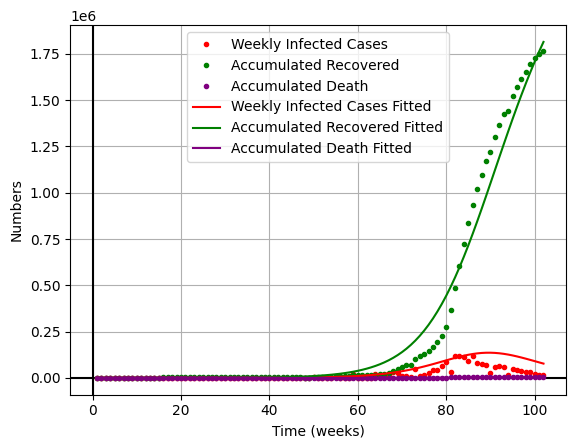

In [430]:
fig, ax1 = plt.subplots();
ax1.grid();
ax1.axvline(x = 0, color = 'black');
ax1.axhline(y = 0, color = 'black');

#ax1.plot(independent_variable, dependent_variable[0,:], '.', label = 'Total Susceptable', color = "blue");
ax1.plot(independent_variable, dependent_variable[1,:], '.', label = 'Weekly Infected Cases', color = "red");
ax1.plot(independent_variable, dependent_variable[2,:], '.', label = 'Accumulated Recovered', color = "green");
ax1.plot(independent_variable, dependent_variable[3,:], '.', label = 'Accumulated Death', color = "purple");

# ax1.plot(independent_variable, dependent_variable_calculated[:,0], label = 'Suscep', color = "green") #before fitting
# ax1.plot(independent_variable, dependent_variable_calculated[:,1], label = 'Infected', color = "blue") #before fitting
# ax1.plot(independent_variable, dependent_variable_calculated[:,2],  label = 'Deaths', color = "red") #before fitting

#ax1.plot(independent_variable, dependent_variable_from_guesses[:,0], label = 'Total Susceptable Fitted', color = "blue"); #after fitting
ax1.plot(independent_variable, dependent_variable_from_guesses[:,1], label = 'Weekly Infected Cases Fitted', color = "red"); #after fitting
ax1.plot(independent_variable, dependent_variable_from_guesses[:,2],  label = 'Accumulated Recovered Fitted', color = "green"); #after fitting
ax1.plot(independent_variable, dependent_variable_from_guesses[:,3],  label = 'Accumulated Death Fitted', color = "purple"); #after fitting

ax1.legend();
ax1.set_xlabel("Time (weeks)");
ax1.set_ylabel("Numbers");

## 1.3 Parameter Estimation for the Period Symtoms Shown to Test Positive of Varies Age Groups.

### 1.3.1 Dataset and Age Group Classification.

In [11]:
symtom_test = pd.read_csv(r"COVID19_line_list_data.csv");
symtom_test.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
symtom_test = symtom_test[["country", "gender", "age", "symptom_onset", "reporting date"]].dropna();
symtom_test

,country,gender,age,symptom_onset,reporting date
0,China,male,66.0,01/03/20,1/20/2020
1,China,female,56.0,1/15/2020,1/20/2020
2,China,male,46.0,01/04/20,1/21/2020
5,China,female,44.0,1/15/2020,1/21/2020
6,China,male,34.0,01/11/20,1/21/2020
...,...,...,...,...,...
963,Hong Kong,female,89.0,2/25/2020,2/27/2020
992,Phillipines,male,44.0,1/25/2020,02/02/20
995,Finland,female,32.0,1/26/2020,1/29/2020
1030,Sweden,female,25.0,1/27/2020,1/31/2020


In [13]:
print("Countries =", symtom_test["country"].unique());
print("Ages =", symtom_test["age"].unique());
print("Min age =", symtom_test["age"].min(), "Max age =", symtom_test["age"].max());

Countries = ['China' 'France' 'Japan' 'Malaysia' 'Nepal' 'Singapore' 'South Korea'
 'Taiwan' 'Thailand' 'USA' 'Vietnam' 'Australia' 'Canada' 'Cambodia'
 'Sri Lanka' 'Germany' 'UAE' 'Hong Kong' 'Phillipines' 'Finland' 'Sweden'
 'Switzerland']
Ages = [66. 56. 46. 44. 34. 37. 39. 18. 32. 51. 57. 50. 52. 33. 40. 28. 19. 38.
 72. 45. 42. 63. 62. 49. 48. 36. 61. 69. 89. 75. 82. 81. 65. 80. 86. 84.
 59. 23. 43. 22. 73. 70. 29. 76. 79. 55. 87. 58. 78. 67.  2. 68. 30. 20.
 24. 41.  9. 27. 15. 21. 64. 71. 35.  4. 47. 31. 25. 85.  5. 60. 11. 53.
 54. 26. 77. 74. 83. 96. 16.]
Min age = 2.0 Max age = 96.0


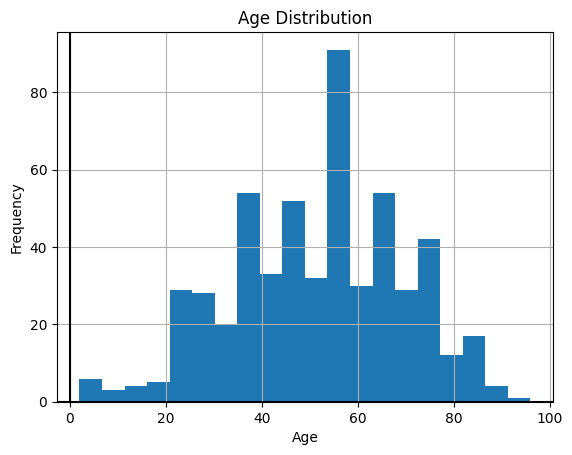

In [14]:
fig, ax1 = plt.subplots();

ax1.hist(symtom_test["age"], bins = 20)

ax1.set_title('Age Distribution');
ax1.set_xlabel("Age");
ax1.set_ylabel("Frequency");

ax1.grid();
ax1.axvline(x = 0, color = 'black');
ax1.axhline(y = 0, color = 'black');

In [15]:
def f(lst):
    l = [];
    for st in lst:
        m, d, y = map(int, st.split("/"));
        if len(str(y)) == 4:
            y = int(str(y)[2:]);
        v = [y, m, d];
        l.append(v);
    return l;

def get_days_between(lst_1: list, lst_2: list) -> list:
    lst = [];
    for i in range(len(lst_1)):
        d1 = datetime.date(lst_1[i][0], lst_1[i][1], lst_1[i][2]);
        d2 = datetime.date(lst_2[i][0], lst_2[i][1], lst_2[i][2]);
        lst.append(abs((d1-d2).days));
    return lst;

def frequency(days_to_detect):
    freq = {};
    for element in days_to_detect:
        if element not in freq:
            freq[element] = 1;
        else:
            freq[element] += 1;
    x = list(freq.values());
    y = list(freq);
    return [y, x];

symptom_onset = f(symtom_test["symptom_onset"].to_list());
reporting_date = f(symtom_test["reporting date"].to_list());
days_to_detect = get_days_between(symptom_onset, reporting_date);
symtom_test["days_to_detect"] = days_to_detect;
symtom_test = symtom_test.loc[symtom_test['days_to_detect'] <= 20];
symtom_test.loc[symtom_test["days_to_detect"] == 0, "days_to_detect"] = 0.5
symtom_test

,country,gender,age,symptom_onset,reporting date,days_to_detect
0,China,male,66.0,01/03/20,1/20/2020,17.0
1,China,female,56.0,1/15/2020,1/20/2020,5.0
2,China,male,46.0,01/04/20,1/21/2020,17.0
5,China,female,44.0,1/15/2020,1/21/2020,6.0
6,China,male,34.0,01/11/20,1/21/2020,10.0
...,...,...,...,...,...,...
963,Hong Kong,female,89.0,2/25/2020,2/27/2020,2.0
992,Phillipines,male,44.0,1/25/2020,02/02/20,8.0
995,Finland,female,32.0,1/26/2020,1/29/2020,3.0
1030,Sweden,female,25.0,1/27/2020,1/31/2020,4.0


### 1.3.2 Probability density function for all Ages.

In [16]:
number_of_days, freq = frequency(symtom_test["days_to_detect"]);
number_of_days = np.array(number_of_days);
freq = np.array(freq);

In [17]:
number_of_days, freq

(array([17. ,  5. ,  6. , 10. ,  7. , 12. ,  2. ,  8. , 11. ,  3. ,  9. ,
        14. ,  4. , 13. , 20. , 16. ,  0.5, 15. , 19. ,  1. , 18. ]),
 array([ 9, 56, 43, 31, 27, 21, 56, 29, 27, 47, 33, 19, 32, 14,  9, 12, 11,
        13,  4, 36,  1]))

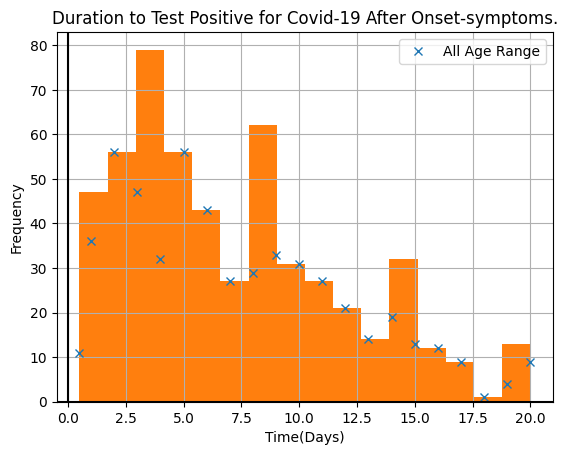

In [18]:
fig, ax1 = plt.subplots();

ax1.plot(number_of_days, freq, "x", label = "All Age Range");
ax1.hist(symtom_test["days_to_detect"], bins = 16)

ax1.set_title('Duration to Test Positive for Covid-19 After Onset-symptoms.');
ax1.set_xlabel("Time(Days)");
ax1.set_ylabel("Frequency");

ax1.grid();
ax1.axvline(x = 0, color = 'black');
ax1.axhline(y = 0, color = 'black');

leg = ax1.legend();

In [19]:
# exponential Probability Distribution.
def expo_func(x, alpha):
    return alpha*np.exp(-alpha*x);

# log-normal Probability Distribution.
def log_normal(x, mean, std):
    return (1/(x*std*np.sqrt(2*np.pi)))*np.exp(-0.5*((np.log(x)-mean)/std)**2)

# linear.
def lin_(x, a, b):
    return a*x+b;

In [20]:
# parameters estimation.
freq_rescaled = freq/sum(freq);
fit_parameter, cov_matrix = scipy.optimize.curve_fit(expo_func, number_of_days, freq_rescaled);
fit_parameter_2, cov_matrix_2 = scipy.optimize.curve_fit(log_normal, number_of_days, freq_rescaled);
fit_parameter_3, cov_matrix_3 = scipy.optimize.curve_fit(lin_, number_of_days, freq_rescaled);

In [21]:
t = np.linspace(0.1, 25, 100)

Expected = [11.42046988] days
Expected = 10.683703226575103 days


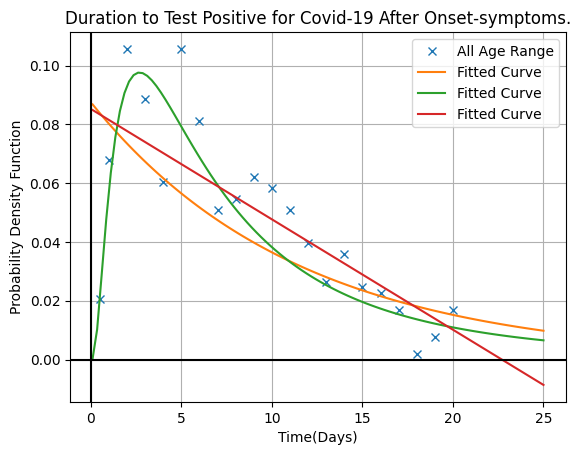

In [22]:
fig, ax2 = plt.subplots();

ax2.plot(number_of_days, freq_rescaled, "x", label = "All Age Range");
ax2.plot(t, expo_func(t, fit_parameter), label = "Fitted Curve")
ax2.plot(t, log_normal(t, fit_parameter_2[0], fit_parameter_2[1]), label = "Fitted Curve")
ax2.plot(t, lin_(t, fit_parameter_3[0], fit_parameter_3[1]), label = "Fitted Curve")

ax2.set_title('Duration to Test Positive for Covid-19 After Onset-symptoms.');
ax2.set_xlabel("Time(Days)");
ax2.set_ylabel("Probability Density Function");

ax2.grid();
ax2.axvline(x = 0, color = 'black');
ax2.axhline(y = 0, color = 'black');

leg = ax2.legend();

print(f"Expected = {1/fit_parameter} days")
print(f"Expected = {np.exp(fit_parameter_2[0] + (1/2)*fit_parameter_2[1]**2)} days")

In [100]:
expo = sum(np.abs(freq_rescaled - expo_func(number_of_days, fit_parameter)))
lognorm = sum(np.abs(freq_rescaled - log_normal(number_of_days, fit_parameter_2[0], fit_parameter_2[1])))
lin = sum(np.abs(freq_rescaled - lin_(number_of_days, fit_parameter_3[0], fit_parameter_3[1])))

In [102]:
print(expo, lognorm, lin)

0.33808520532519837 0.22737879667190852 0.27746195971303705


### 1.3.4 Log-normal Distribution for Different Age Groups.

#### Toodler and Child (0, 12] and Teenage (12, 18]

In [14]:
df_toodler_child_teenage = symtom_test.loc[(symtom_test['age'] > 0) & (symtom_test['age'] <= 18)];
df_toodler_child_teenage

,country,gender,age,symptom_onset,reporting date,days_to_detect
10,China,female,18.0,1/19/2020,1/21/2020,2.0
115,China,female,2.0,1/22/2020,1/25/2020,3.0
134,China,female,9.0,1/21/2020,1/25/2020,4.0
138,China,male,15.0,1/21/2020,1/25/2020,4.0
170,China,female,4.0,1/18/2020,1/27/2020,9.0
183,China,male,18.0,01/20/2020,1/27/2020,7.0
315,Japan,male,5.0,2/15/2020,2/21/2020,6.0
316,Japan,male,15.0,2/18/2020,2/21/2020,3.0
339,Japan,female,15.0,02/06/20,2/22/2020,16.0
416,Japan,male,5.0,2/21/2020,2/27/2020,6.0


In [15]:
number_of_days, freq = frequency(df_toodler_child_teenage["days_to_detect"]);
freq_rescaled = np.array(freq)/sum(freq);

In [16]:
# probability density function 
freq_rescaled = np.array(freq)/sum(freq);
fit_parameter, cov_matrix = scipy.optimize.curve_fit(log_normal, number_of_days, freq_rescaled);

Expected = 7.033529929393961 days


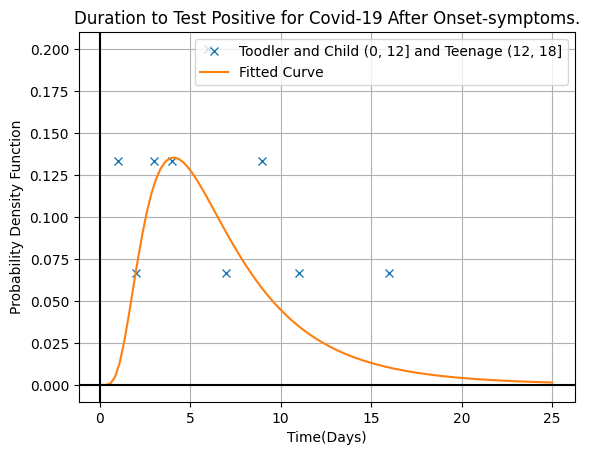

In [17]:
fig, ax2 = plt.subplots();

ax2.plot(number_of_days, freq_rescaled, "x", label = "Toodler and Child (0, 12] and Teenage (12, 18]");
ax2.plot(t, log_normal(t, fit_parameter[0], fit_parameter[1]), label = "Fitted Curve")

ax2.set_title('Duration to Test Positive for Covid-19 After Onset-symptoms.');
ax2.set_xlabel("Time(Days)");
ax2.set_ylabel("Probability Density Function");

ax2.grid();
ax2.axvline(x = 0, color = 'black');
ax2.axhline(y = 0, color = 'black');

leg = ax2.legend();

print(f"Expected = {np.exp(fit_parameter[0] + (1/2)*fit_parameter[1]**2)} days")

#### Young Adult (18, 22]

In [18]:
df_young_adult = symtom_test.loc[(symtom_test['age'] > 18) & (symtom_test['age'] <= 22)];
df_young_adult

,country,gender,age,symptom_onset,reporting date,days_to_detect
25,China,male,19.0,1/20/2020,1/22/2020,2.0
76,China,male,22.0,1/20/2020,1/23/2020,3.0
128,China,female,20.0,1/19/2020,1/25/2020,6.0
152,China,female,19.0,1/19/2020,1/25/2020,6.0
155,China,female,21.0,1/25/2020,1/25/2020,0.5
770,Australia,female,21.0,1/24/2020,1/26/2020,2.0
957,Hong Kong,female,21.0,02/12/20,2/26/2020,14.0


In [19]:
number_of_days, freq = frequency(df_young_adult["days_to_detect"]);
freq_rescaled = np.array(freq)/sum(freq);

In [20]:
# probability density function 
freq_rescaled = np.array(freq)/sum(freq);
fit_parameter, cov_matrix = scipy.optimize.curve_fit(log_normal, number_of_days, freq_rescaled);

Expected = 3.9893242992423907 days


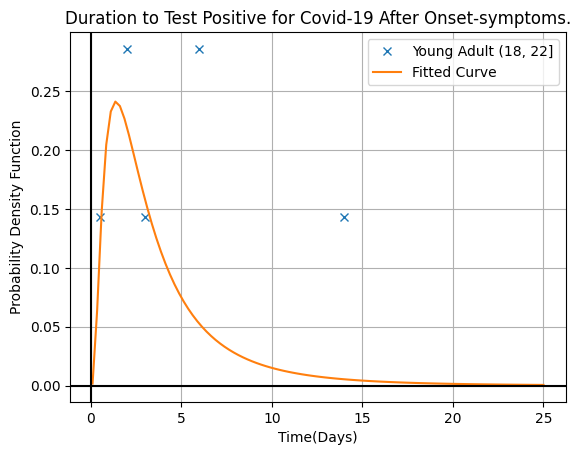

In [21]:
fig, ax2 = plt.subplots();

ax2.plot(number_of_days, freq_rescaled, "x", label = "Young Adult (18, 22]");
ax2.plot(t, log_normal(t, fit_parameter[0], fit_parameter[1]), label = "Fitted Curve")

ax2.set_title('Duration to Test Positive for Covid-19 After Onset-symptoms.');
ax2.set_xlabel("Time(Days)");
ax2.set_ylabel("Probability Density Function");

ax2.grid();
ax2.axvline(x = 0, color = 'black');
ax2.axhline(y = 0, color = 'black');

leg = ax2.legend();

print(f"Expected = {np.exp(fit_parameter[0] + (1/2)*fit_parameter[1]**2)} days")

#### Adult (22, 30]

In [22]:
df_adult = symtom_test.loc[(symtom_test['age'] > 22) & (symtom_test['age'] <= 30)];
df_adult;

In [23]:
number_of_days, freq = frequency(df_adult["days_to_detect"]);
freq_rescaled = np.array(freq)/sum(freq);

In [24]:
# probability density function 
freq_rescaled = np.array(freq)/sum(freq);
fit_parameter, cov_matrix = scipy.optimize.curve_fit(log_normal, number_of_days, freq_rescaled);


Expected = 10.521858774870157 days


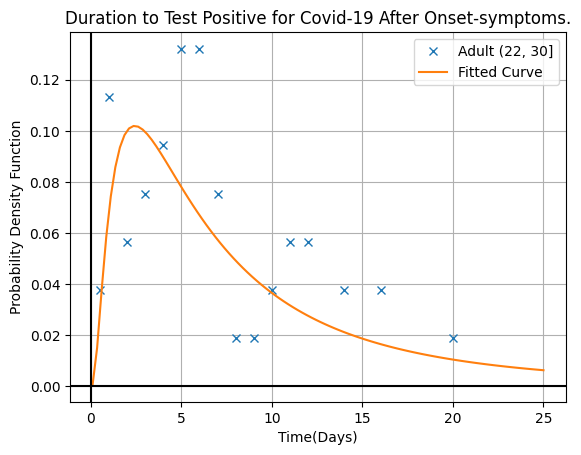

In [25]:
fig, ax2 = plt.subplots();

ax2.plot(number_of_days, freq_rescaled, "x", label = "Adult (22, 30]");
ax2.plot(t, log_normal(t, fit_parameter[0], fit_parameter[1]), label = "Fitted Curve")

ax2.set_title('Duration to Test Positive for Covid-19 After Onset-symptoms.');
ax2.set_xlabel("Time(Days)");
ax2.set_ylabel("Probability Density Function");

ax2.grid();
ax2.axvline(x = 0, color = 'black');
ax2.axhline(y = 0, color = 'black');

leg = ax2.legend();

print(f"Expected = {np.exp(fit_parameter[0] + (1/2)*fit_parameter[1]**2)} days")


#### Middle-age Adult (30, 45]

In [26]:
df_middle_age_adult = symtom_test.loc[(symtom_test['age'] > 30) & (symtom_test['age'] <= 45)];
df_middle_age_adult

,country,gender,age,symptom_onset,reporting date,days_to_detect
5,China,female,44.0,1/15/2020,1/21/2020,6.0
6,China,male,34.0,01/11/20,1/21/2020,10.0
7,China,male,37.0,1/14/2020,1/21/2020,7.0
8,China,male,39.0,01/09/20,1/21/2020,12.0
11,China,female,32.0,01/15/2020,1/21/2020,6.0
...,...,...,...,...,...,...
937,Hong Kong,female,38.0,02/10/20,2/20/2020,10.0
945,Hong Kong,male,35.0,2/19/2020,2/24/2020,5.0
952,Hong Kong,male,33.0,2/20/2020,2/25/2020,5.0
992,Phillipines,male,44.0,1/25/2020,02/02/20,8.0


In [27]:
number_of_days, freq = frequency(df_middle_age_adult["days_to_detect"]);
freq_rescaled = np.array(freq)/sum(freq);

In [28]:
# probability density function 
freq_rescaled = np.array(freq)/sum(freq);
fit_parameter, cov_matrix = scipy.optimize.curve_fit(log_normal, number_of_days, freq_rescaled);


Expected = 7.819567434730085 days


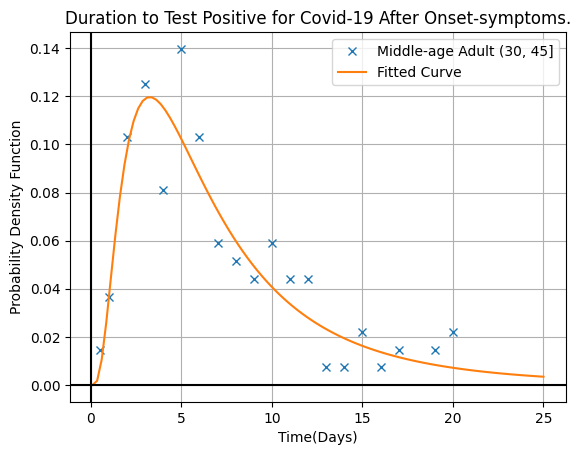

In [29]:
fig, ax2 = plt.subplots();

ax2.plot(number_of_days, freq_rescaled, "x", label = "Middle-age Adult (30, 45]");
ax2.plot(t, log_normal(t, fit_parameter[0], fit_parameter[1]), label = "Fitted Curve")

ax2.set_title('Duration to Test Positive for Covid-19 After Onset-symptoms.');
ax2.set_xlabel("Time(Days)");
ax2.set_ylabel("Probability Density Function");

ax2.grid();
ax2.axvline(x = 0, color = 'black');
ax2.axhline(y = 0, color = 'black');

leg = ax2.legend();

print(f"Expected = {np.exp(fit_parameter[0] + (1/2)*fit_parameter[1]**2)} days")


#### Old Adult (45, 60]

In [30]:
df_old_adult = symtom_test.loc[(symtom_test['age'] > 45) & (symtom_test['age'] <= 60)];
df_old_adult

,country,gender,age,symptom_onset,reporting date,days_to_detect
1,China,female,56.0,1/15/2020,1/20/2020,5.0
2,China,male,46.0,01/04/20,1/21/2020,17.0
9,China,male,56.0,1/16/2020,1/21/2020,5.0
13,China,male,51.0,1/16/2020,1/21/2020,5.0
14,China,male,57.0,1/16/2020,1/22/2020,6.0
...,...,...,...,...,...,...
948,Hong Kong,female,59.0,2/24/2020,2/24/2020,0.5
949,Hong Kong,female,58.0,02/04/20,2/24/2020,20.0
953,Hong Kong,female,55.0,2/17/2020,2/25/2020,8.0
955,Hong Kong,female,60.0,02/12/20,2/25/2020,13.0


In [31]:
number_of_days, freq = frequency(df_old_adult["days_to_detect"]);
freq_rescaled = np.array(freq)/sum(freq);

In [32]:
# probability density function 
freq_rescaled = np.array(freq)/sum(freq);
fit_parameter, cov_matrix = scipy.optimize.curve_fit(log_normal, number_of_days, freq_rescaled);


Expected = 9.673806688782419 days


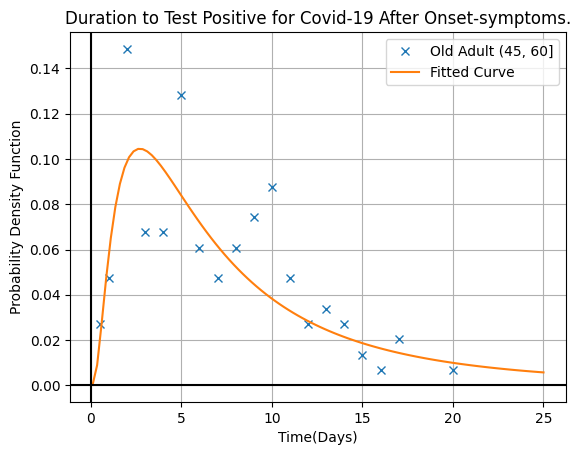

In [33]:
fig, ax2 = plt.subplots();

ax2.plot(number_of_days, freq_rescaled, "x", label = "Old Adult (45, 60]");
ax2.plot(t, log_normal(t, fit_parameter[0], fit_parameter[1]), label = "Fitted Curve")

ax2.set_title('Duration to Test Positive for Covid-19 After Onset-symptoms.');
ax2.set_xlabel("Time(Days)");
ax2.set_ylabel("Probability Density Function");

ax2.grid();
ax2.axvline(x = 0, color = 'black');
ax2.axhline(y = 0, color = 'black');

leg = ax2.legend();

print(f"Expected = {np.exp(fit_parameter[0] + (1/2)*fit_parameter[1]**2)} days")


#### Senior >60

In [34]:
df_senior = symtom_test.loc[symtom_test['age'] > 60];
df_senior

,country,gender,age,symptom_onset,reporting date,days_to_detect
0,China,male,66.0,01/03/20,1/20/2020,17.0
27,China,female,66.0,1/17/2020,1/22/2020,5.0
34,China,male,72.0,1/19/2020,1/22/2020,3.0
41,China,male,63.0,1/14/2020,1/23/2020,9.0
42,China,female,62.0,01/09/20,1/23/2020,14.0
...,...,...,...,...,...,...
947,Hong Kong,female,68.0,2/19/2020,2/24/2020,5.0
959,Hong Kong,male,80.0,2/25/2020,2/26/2020,1.0
962,Hong Kong,female,70.0,2/13/2020,2/27/2020,14.0
963,Hong Kong,female,89.0,2/25/2020,2/27/2020,2.0


In [35]:
number_of_days, freq = frequency(df_senior["days_to_detect"]);
freq_rescaled = np.array(freq)/sum(freq);

In [36]:
# probability density function 
freq_rescaled = np.array(freq)/sum(freq);
fit_parameter, cov_matrix = scipy.optimize.curve_fit(log_normal, number_of_days, freq_rescaled);


Expected = 16.52925703809405 days


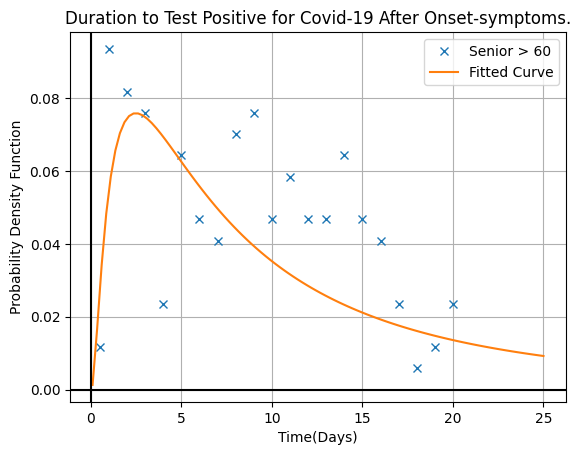

In [37]:
fig, ax2 = plt.subplots();

ax2.plot(number_of_days, freq_rescaled, "x", label = "Senior > 60");
ax2.plot(t, log_normal(t, fit_parameter[0], fit_parameter[1]), label = "Fitted Curve")

ax2.set_title('Duration to Test Positive for Covid-19 After Onset-symptoms.');
ax2.set_xlabel("Time(Days)");
ax2.set_ylabel("Probability Density Function");

ax2.grid();
ax2.axvline(x = 0, color = 'black');
ax2.axhline(y = 0, color = 'black');

leg = ax2.legend();

print(f"Expected = {np.exp(fit_parameter[0] + (1/2)*fit_parameter[1]**2)} days")


### 1.3.5 Relatioship Between Age Groups and Onset-symtoms to Test Postive Duration and Statistical Analysis.

In [38]:
x = np.array([18/2, (22+18)/2, (22+30)/2, (30+45)/2, (45+60)/2, 60]);
y = np.array([7.033529929393961, 3.9893242992423907, 10.521858774870157, 7.948055992589436, 9.816529689577287, 17.023866837363347]);

In [39]:
# least sqaure to best fit.
Matrix = np.vstack([x, np.ones(len(x))]).T;
y = y[:, np.newaxis];
m, b = np.dot((np.dot(np.linalg.inv(np.dot(Matrix.T, Matrix)), Matrix.T)), y);
print(m, b);

[0.17061887] [3.55938278]


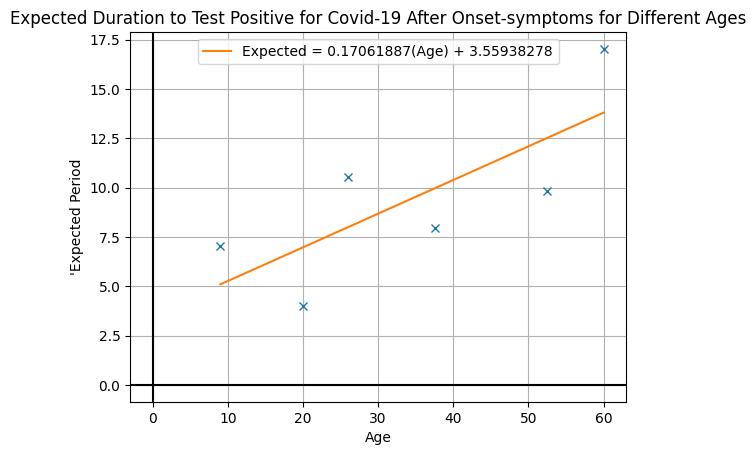

In [40]:
fig, ax3 = plt.subplots();

ax3.plot(x, y, "x");
ax3.plot(x, m*x+b, label = "Expected = 0.17061887(Age) + 3.55938278");

ax3.set_title('Expected Duration to Test Positive for Covid-19 After Onset-symptoms for Different Ages');
ax3.set_xlabel("Age");
ax3.set_ylabel("'Expected Period");

ax3.grid();
ax3.axvline(x = 0, color = 'black');
ax3.axhline(y = 0, color = 'black');

leg = ax3.legend();

### 1.3.6 T-test for Two-Sample Whether There is a Difference Between Male and Female in Terms of Expected Duration to Test Positive.

Unpaired
<br>
<br>
$H_0$ : mean of males and females are equal.
<br>
$H_a$ : mean of males and females are not equal.

Assuming equal variances:

\begin{equation}
t= \frac{\bar{x_1}-\bar{x_2}}{\sqrt{s^2(\frac{1}{n_1}+\frac{1}{n_2})}}
\end{equation}

Assuming unequal variances:

\begin{equation}
t= \frac{\bar{x_1}-\bar{x_2}}{\sqrt{(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2})}}
\end{equation}

Degrees of freedom: $(n_1-1) + (n_2-1)$

In [96]:
t_test = symtom_test[["gender", "age", "days_to_detect"]];
t_test

,gender,age,days_to_detect
0,male,66.0,17.0
1,female,56.0,5.0
2,male,46.0,17.0
5,female,44.0,6.0
6,male,34.0,10.0
...,...,...,...
963,female,89.0,2.0
992,male,44.0,8.0
995,female,32.0,3.0
1030,female,25.0,4.0


In [97]:
males = t_test.loc[symtom_test['gender'] == "male"];
females = t_test.loc[symtom_test['gender'] == "female"];

In [118]:
def create_subsets(df, n):
    subsets = [];
    while len(df) > 0:
        if len(df) < n:
            subset = df;
            df = pd.DataFrame(columns = df.columns);
        else:
            subset = df.sample(n = n, replace = False);
            df = df.drop(subset.index);
        subsets.append(subset);
    return subsets;

def expected_values(lst):
    expected_values = [];
    for df in lst:
        number_of_days, freq = frequency(df["days_to_detect"]);
        freq_rescaled = np.array(freq)/sum(freq);
        fit_parameter, cov_matrix = scipy.optimize.curve_fit(log_normal, np.array(number_of_days), freq_rescaled);
        expected = np.exp(fit_parameter[0] + (1/2)*fit_parameter[1]**2);
        expected_values.append(expected);
    return expected_values;

In [119]:
males_subset = create_subsets(males, 20);
females_subset = create_subsets(females, 20);

In [120]:
expected_values_male = expected_values(males_subset);
expected_values_female = expected_values(females_subset);

In [127]:
n_male = len(males);
n_female = len(females);

male_avg = np.mean(expected_values_male);
female_avg = np.mean(expected_values_female);

SS_male = sum([i-male_avg for i in expected_values_male]);
s_male = (SS_male/(n_male-1))**1/2;
s_x_male = s_male/((n_male)**1/2);

SS_female = sum([i-female_avg for i in expected_values_female]);
s_female = (SS_female/(n_female-1))**1/2;
s_x_female = s_female/((n_male)**1/2);

# t-test assume unequal variances
t = male_avg-female_avg/((s_x_male**2/n_male) + (s_x_female**2/n_female))**1/2
deg = n_male + n_female -2
p_value = scipy.stats.t.sf(abs(t), df = deg)*2

In [128]:
print(f"mean of male = {male_avg}, mean of female = {female_avg},\nnumber of males = {n_male}, number of females = {n_female},\nt score = {t}, degree of freedom = {deg}, p-value = {p_value}")

mean of male = 8.60041251775631, mean of female = 8.628598300891714,
number of males = 319, number of females = 211,
t score = -6.010960587399748e+41, degree of freedom = 528, p-value = 0.0


# Chapter III MODELS AND IMPROVEMENTS

## 3.1. Simulation in a Confined Environment

In [84]:
class Individual:
    def __init__(self, age, initial_position, velocity, state, radius_of_infection, days_to_susceptible, max_position_y, max_position_x):
        self.age = age;
        self.position = initial_position;
        self.velocity = velocity;
        self.state = state;
        self.radius_of_infection = radius_of_infection;
        self.days_to_susceptible = days_to_susceptible;
        self.max_position_y = max_position_y;
        self.max_position_x = max_position_x;
        self.days_exist = 0;
    
    def move(self):
        new_position_x = self.position[0] + self.velocity[0];
        new_position_y = self.position[1] + self.velocity[1];
        
        if new_position_x > self.max_position_x:
            new_position_x = self.max_position_x;
            self.velocity = (-self.velocity[0], self.velocity[1]);
        elif new_position_x < 0:
            new_position_x = 0;
            self.velocity = (-self.velocity[0], self.velocity[1]);
            
        if new_position_y > self.max_position_y:
            new_position_y = self.max_position_y;
            self.velocity = (self.velocity[0], -self.velocity[1]);
        elif new_position_y < 0:
            new_position_y = 0;
            self.velocity = (self.velocity[0], -self.velocity[1]);
        
        self.position = (new_position_x, new_position_y);
        
    def infect(self, other):
        if self.state == "infected" and other.state == "susceptible":
            distance = np.sqrt((self.position[0] - other.position[0])**2 + (self.position[1] - other.position[1])**2);
            if distance <= self.radius_of_infection:
                if random.random() < 0.5:
                    other.state = "infected";
    
    def update_state(self):
        if self.state == "infected":
            days_to_recovered = 7;
            if self.days_exist >= days_to_recovered:
                self.state = "recovered";
                self.days_exist = 0;
            else:
                self.days_exist += 1;
        elif self.state == "recovered":
            if self.days_exist >= self.days_to_susceptible:
                self.state = "susceptible";
                self.days_exist = 0;
            else:
                self.days_exist += 1;

In [85]:
class Space:
    def __init__(self, population, max_position_x, max_position_y):
        self.max_position_y = max_position_y;
        self.max_position_x = max_position_x;
        self.population = population;

        self.initial_infected = 0;
        for individual in self.population:
            if individual.state == "infected":
                self.initial_infected += 1;
            else:
                break;
    
    def run(self, num_time_frames):
        infected_count = [self.initial_infected];
        susceptible_count = [len(self.population) - self.initial_infected];
        recovered_count = [0];
        
        for t in range(num_time_frames):
            for individual in self.population:
                individual.move();
                
            for individual in self.population:
                for other in self.population:
                    individual.infect(other);
                
            for individual in self.population:
                individual.update_state();
                
            infected_count.append(sum([1 for individual in self.population if individual.state == "infected"]));
            susceptible_count.append(sum([1 for individual in self.population if individual.state == "susceptible"]));
            recovered_count.append(sum([1 for individual in self.population if individual.state == "recovered"]));
            
            fig, ax = plt.subplots();
            colors = {"infected": "red", "susceptible": "blue", "recovered": "green"};
            for individual in self.population:
                x, y = individual.position;
                color = colors[individual.state];
                ax.scatter(x, y, color = color);
            ax.set_xlim(0, self.max_position_x);
            ax.set_ylim(0, self.max_position_y);
            ax.set_xlabel("X position");
            ax.set_ylabel("Y position");
            ax.grid();
            ax.axvline(x = 0, color = 'black');
            ax.axhline(y = 0, color = 'black');
            ax.set_title(f"Individual Positions at Time {t+1}");
            plt.show();
            display.clear_output(wait = True);

        fig, ax = plt.subplots();
        ax.plot(infected_count, label="Infected", color = "red");
        ax.plot(susceptible_count, label="Susceptible", color = "blue");
        ax.plot(recovered_count, label="Recovered", color = "green");
        ax.grid();
        ax.axvline(x = 0, color = 'black');
        ax.axhline(y = 0, color = 'black');
        ax.legend();
        ax.set_xlabel("Time");
        ax.set_ylabel("Population");
        ax.set_title("Population Simulation");
        plt.show();
        
        return infected_count, susceptible_count, recovered_count;

In [86]:
# create the population
max_position_x = 100;
max_position_y = 100;
initial_infected = 8;
radius_of_infection = 3;
population_size = 200;
population = [];

for i in range(population_size):
    if i < initial_infected:
        state = "infected";
    else:
        state = "susceptible";
    age = np.random.normal(loc = 39.3, scale = 2);
    initial_position = (random.uniform(0, max_position_x), random.uniform(0, max_position_y));
    velocity = (random.uniform(-1, 1), random.uniform(-1, 1));
    days_to_susceptible = 0.17061887*(age) + 3.55938278;
    
    population.append(Individual(age, initial_position, velocity, state, radius_of_infection,days_to_susceptible, max_position_x, max_position_y));

simulation = Space(population, max_position_y, max_position_x);
infected_count, susceptible_count, recovered_count = simulation.run(num_time_frames = 5);

### 3.1.1 Class Individual

In [2]:
class Individual:
    def __init__(self, age, initial_position, velocity, state, protection, radius_of_infection):
        self.age = age;
        self.position = initial_position;
        self.velocity = velocity;
        self.state = state;
        self.protection = protection;
        self.radius_of_infection = radius_of_infection-protection;

    def move(self):
        new_position_x = self.position[0] + self.velocity[0];
        new_position_y = self.position[1] + self.velocity[1];
        self.position = (new_position_x, new_position_y);
    
    def infect(self, other):
        distance = np.sqrt((self.position[0] - other.position[0])**2 + (self.position[1] - other.position[1])**2);
        if distance <= self.radius_of_infection:
            if other.protection > 0:
                if random.random() < 0.5 + (other.protection/5): 
                    other.state = "exposed";
            else:
                if random.random() < 0.5:
                    other.state = "exposed";
    
    def update(self):
        self.move();

# math.exp(-distance**2/(2*self.radius_of_infection**2))

In [3]:
class SpaceTime:
    def __init__(self, population, max_position_x, max_position_y):
        self.max_position_x = max_position_x;
        self.max_position_y = max_position_y;
        self.population = population;
    
    def check(self, individual):
        current_position_x = individual.position[0];
        current_position_y = individual.position[1];

        if current_position_x > self.max_position_x:
            current_position_x = self.max_position_x;
            individual.velocity = (-individual.velocity[0], individual.velocity[1]);
        elif current_position_x < 0:
            current_position_x = 0;
            individual.velocity = (-individual.velocity[0], individual.velocity[1]);
        elif (current_position_x > 0) and (current_position_x < self.max_position_x):
            current_position_x = individual.position[0];
            
        if current_position_y > self.max_position_y:
            current_position_y = self.max_position_y;
            individual.velocity = (individual.velocity[0], -individual.velocity[1]);
        elif individual.position[1] < 0:
            current_position_y = 0;
            individual.velocity = (individual.velocity[0], -individual.velocity[1]);
        elif (individual.position[1] > 0) and (individual.position[1] < self.max_position_y):
            current_position_y = individual.position[1];
        
        individual.position = (current_position_x, current_position_y);

    def run(self, num_time_frames):
        exposed_count = [0];
        susceptible_count = [len(self.population)];
        
        for sec in range(num_time_frames):

            fig, ax = plt.subplots();
            colors = {"infected": "red", "susceptible": "blue", "exposed": "purple"};

            for individual in self.population:
                for other in self.population:
                    self.check(other);
                    if (individual.state == "infected" and other.state == "susceptible"):
                        individual.infect(other);
            
                x, y = individual.position;
                color = colors[individual.state];
                ax.scatter(x, y, color = color);
            
                individual.update();
            
            ax.set_xlim(0, self.max_position_x);
            ax.set_ylim(0, self.max_position_y);
            ax.set_xlabel("X position");
            ax.set_ylabel("Y position");
            ax.grid();
            ax.axvline(x = 0, color = 'black');
            ax.axhline(y = 0, color = 'black');
            ax.set_title(f"Individual Positions at Time {sec + 1}");
            plt.show();
            display.clear_output(wait = True);
        
#        return exposed_count, susceptible_count;
#exposed_count, susceptible_count = simulation.run(num_time_frames = 100);

### 4.2 Input the Parameters and Simulate the Spread.

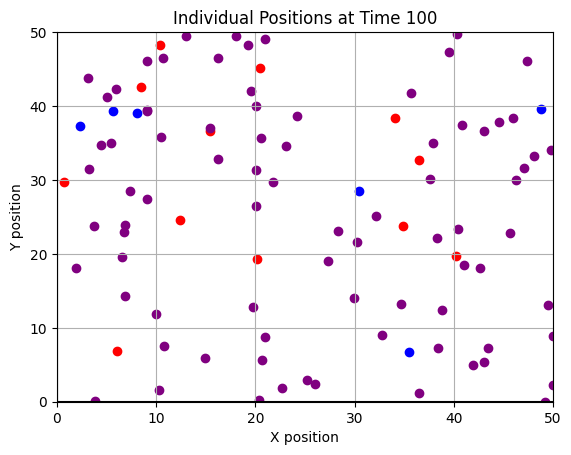

In [4]:
# define the population
initial_infected = 12;
radius_of_infection = 3;
population_size = 100;
population = [];

# define the dimemsions
max_position_x = 50;
max_position_y = 50;

# create the population
for i in range(population_size):
    if i < initial_infected:
        state = "infected";
    else:
        state = "susceptible";
    age = np.random.normal(loc = 39.3, scale = 3);
    protection = random.randint(0, 1); 
    initial_position = (random.uniform(0, max_position_x), random.uniform(0, max_position_y));
    velocity = (random.uniform(-1, 1), random.uniform(-1, 1));
    population.append(Individual(age, initial_position, velocity, state, protection, radius_of_infection));

# simulate the spread
simulation = SpaceTime(population, max_position_y, max_position_x);
simulation.run(num_time_frames = 100);

# 3.2 ML Classification Models to Determine Mortality Given Individual’s Clinical Features.

### 3.1 Data Cleaning.

The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

1. sex: 1 for female and 2 for male.<br>
2. classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.<br>
3. patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.<br>
4. pneumonia: whether the patient already have air sacs inflammation or not.<br>
5. pregnancy: whether the patient is pregnant or not.<br>
6. diabetes: whether the patient has diabetes or not.<br>
7. copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.<br>
8. asthma: whether the patient has asthma or not.<br>
9. inmsupr: whether the patient is immunosuppressed or not.<br>
10. hypertension: whether the patient has hypertension or not.<br>
11. cardiovascular: whether the patient has heart or blood vessels related disease.<br>
12. renal chronic: whether the patient has chronic renal disease or not.<br>
13. other disease: whether the patient has other disease or not.<br>
14. obesity: whether the patient is obese or not.<br>
15. tobacco: whether the patient is a tobacco user.<br>
16. usmr: Indicates whether the patient treated medical units of the first, second or third level.<br>
17. medical unit: type of institution of the National Health System that provided the care.<br>
18. intubed: whether the patient was connected to the ventilator.<br>
19. icu: Indicates whether the patient had been admitted to an Intensive Care Unit.<br>
20. date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.<br>

In [13]:
patient = pd.read_csv(r"C:\Users\Nitti\OneDrive\Documents\u6281455\ICMA 446 Research Project in Applied Mathematics\Raw Data Set\covid_data.csv");
patient

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [14]:
patient = patient[patient['INTUBED'] != 1];
patient = patient[patient['ICU'] != 1];
patient = patient[patient['PNEUMONIA'] != 99];
patient = patient[patient['DIABETES'] != 98];
patient = patient[patient['ASTHMA'] != 98];
patient = patient[patient['HIPERTENSION'] != 98];
patient = patient[patient['CARDIOVASCULAR'] != 98];
patient = patient[patient['OBESITY'] != 98];
patient = patient[patient['RENAL_CHRONIC'] != 98];
patient = patient[patient['TOBACCO'] != 98];

patient.loc[patient["PATIENT_TYPE"] == 1, "PATIENT_TYPE"] = 0;
patient.loc[patient["PATIENT_TYPE"] == 2, "PATIENT_TYPE"] = 1;

patient.loc[patient["SEX"] == 2, "SEX"] = 5;

patient.loc[patient["DATE_DIED"] != "9999-99-99", "DATE_DIED"] = 1;
patient.loc[patient["DATE_DIED"] == "9999-99-99", "DATE_DIED"] = 0;
patient.rename(columns = {'DATE_DIED':'DIED'}, inplace = True);
patient['DIED'] = patient['DIED'].astype(str).astype(int);

patient = patient.drop(columns= ["MEDICAL_UNIT", "INTUBED", "PREGNANT", "COPD", "ICU"]);

patient.loc[patient["PNEUMONIA"] == 2, "PNEUMONIA"] = 0;
patient.loc[patient["DIABETES"] == 2, "DIABETES"] = 0;
patient.loc[patient["ASTHMA"] == 2, "ASTHMA"] = 0;
patient.loc[patient["INMSUPR"] == 2, "INMSUPR"] = 0;
patient.loc[patient["HIPERTENSION"] == 2, "HIPERTENSION"] = 0;
patient.loc[patient["OTHER_DISEASE"] == 2, "OTHER_DISEASE"] = 0;
patient.loc[patient["CARDIOVASCULAR"] == 2, "CARDIOVASCULAR"] = 0;
patient.loc[patient["OBESITY"] == 2, "OBESITY"] = 0;
patient.loc[patient["RENAL_CHRONIC"] == 2, "RENAL_CHRONIC"] = 0;
patient.loc[patient["TOBACCO"] == 2, "TOBACCO"] = 0;

patient

,USMER,SEX,PATIENT_TYPE,DIED,PNEUMONIA,AGE,DIABETES,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,0,1,1,65,0,0,0,1,0,0,0,0,0,3
1,2,5,0,1,1,72,0,0,0,1,0,0,1,1,0,5
3,2,1,0,1,0,53,0,0,0,0,0,0,0,0,0,7
4,2,5,0,1,0,68,1,0,0,1,0,0,0,0,0,3
5,2,1,1,0,1,40,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,5,0,0,0,40,0,0,0,0,0,0,0,0,0,7
1048571,1,5,1,0,0,51,0,0,0,1,0,0,0,0,0,7
1048572,2,5,0,0,0,55,0,0,0,0,0,0,0,0,0,7
1048573,2,5,0,0,0,28,0,0,0,0,0,0,0,0,0,7


### 3.2 Graphs of the Odd Liklihood.

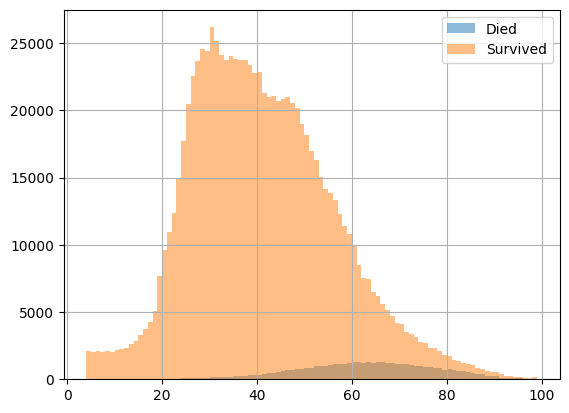

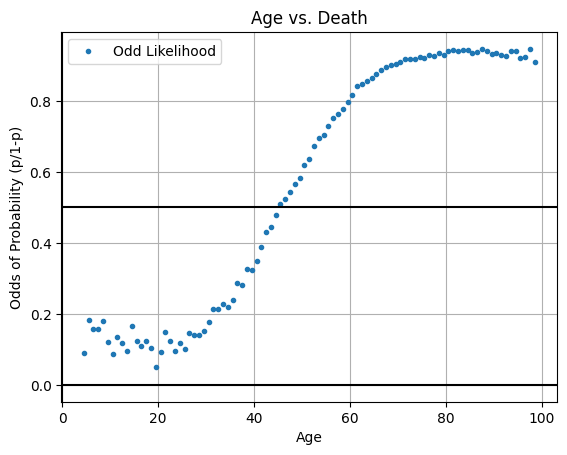

In [15]:
x1 = patient.loc[patient.DIED == 1, 'AGE']
x2 = patient.loc[patient.DIED == 0, 'AGE']

bins = np.arange(4, 100, 1)
hp, b1, p1 = plt.hist(x1, bins = bins, alpha = 0.5, label = 'Died')
hm, b2, p2 = plt.hist(x2, bins = bins, alpha = 0.5, label = 'Survived')
plt.grid()
plt.legend()

midpoints = (bins[1:] + bins[:-1])/2.0
prob = [ [m, x1/(x2+x1)] for m, x1, x2 in zip(midpoints, hp, hm/35) if x1+x2 > 0]
xs = [x for x, y in prob]
ys = [y for x, y in prob]

fig, ax = plt.subplots();
ax.plot(xs, ys, ".", label = "Odd Likelihood");
ax.set_title('Age vs. Death');
ax.set_xlabel("Age");
ax.set_ylabel("Odds of Probability (p/1-p)");
ax.grid();
ax.axvline(x = 0, color = 'black');
ax.axhline(y = 0, color = 'black');
ax.axhline(y = 0.5, color = 'black');
leg = ax.legend();

In [16]:
# splittign the data to train test and validate
features = patient.drop(columns = ["DIED"]);
target = patient['DIED'];
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42);

### 3.2.1 Logistic Model to Determine Mortality.

In [18]:
log_model = LogisticRegression();
log_model.fit(X_train, y_train);
y_pred = log_model.predict(X_test);
print("Accuracy:", accuracy_score(y_test, y_pred));
print("Precision:", precision_score(y_test, y_pred));
print("Recall:", recall_score(y_test, y_pred));
print("F1 Score:", f1_score(y_test, y_pred));
print(pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes']));
print(classification_report(y_test,y_pred));

C:\Users\Nitti\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9544127929954702
Precision: 0.5318114563517227
Recall: 0.2705958270595827
F1 Score: 0.35868557987026867
            Predicted No  Predicted Yes
Actual No         185845           2215
Actual Yes          6782           2516
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    188060
           1       0.53      0.27      0.36      9298

    accuracy                           0.95    197358
   macro avg       0.75      0.63      0.67    197358
weighted avg       0.94      0.95      0.95    197358



### 3.2.2 Random Forest to Determine Mortality.

In [339]:
rand_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42);
rand_forest_model.fit(X_train, y_train);
y_pred = rand_forest_model.predict(X_test);
print("Accuracy:", accuracy_score(y_test, y_pred));
print("Precision:", precision_score(y_test, y_pred));
print("Recall:", recall_score(y_test, y_pred));
print("F1 Score:", f1_score(y_test, y_pred));
print(pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes']));
print(classification_report(y_test,y_pred));

Accuracy: 0.951681715461243
Precision: 0.4795813315030885
Recall: 0.300602280060228
F1 Score: 0.3695623429855877
            Predicted No  Predicted Yes
Actual No         185027           3033
Actual Yes          6503           2795
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    188060
           1       0.48      0.30      0.37      9298

    accuracy                           0.95    197358
   macro avg       0.72      0.64      0.67    197358
weighted avg       0.94      0.95      0.95    197358



### 3.3.3 $\chi^2$ Test of Independence: Find the Relationship Between Features and Severity of Individual.